#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données: feuille 4
### Régression linéaire simple et multiple

##### Avant de commencer :

Le régression linéaire est l'une des méthodes statistiques les plus utilisées en sciences de données. Elle est utilisée pour <em>prédire</em> les valeurs d'une variable <em>dépendante</em> continue en fonction d'une ou plusieurs variables <em>indépendantes</em>.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Exercice 1. Régression linéaire simple.

La gérante d’un commerce veut évaluer l’impact des frais déboursés en publicité par mois (représentés par une variable $X$ exprimée en milliers d’euros) sur le chiffre d’affaires mensuel (représenté par une variable $Y$ exprimée en milliers d’euros). On aimerait évaluer dans quelle mesure une modification du budget publicitaire mensuel affecterait le chiffre d’affaires mensuel. On a donc recueilli sur une période de 10 mois les données du tableau ci-dessous.

<table>
<tr><td>Chiffre d'affaires</td> <td>220</td> <td>280</td> <td>250</td> <td>170</td> <td>150</td> <td>340</td> <td>310</td> <td>210</td> <td>180</td> <td>190</td></tr>
<tr><td>Frais publicitaires</td> <td>2.6</td> <td>2.6</td> <td>2.4</td> <td>1.5</td> <td>0.9</td> <td>3.0</td> <td>2.7</td> <td>2.3</td> <td>1.7</td> <td>1.9</td></tr>

</table>    

1. Créer un <code>DataFrame</code> contenant les données du tableau ci-dessus.

In [4]:
d = {'ca': [220, 280, 250, 170, 150, 340, 310, 210, 180, 190],
     'fp': [2.6, 2.6, 2.4, 1.5, 0.9, 3.0, 2.7, 2.3, 1.7, 1.9]}
df = pd.DataFrame(data = d)
df

,ca,fp
0,220,2.6
1,280,2.6
2,250,2.4
3,170,1.5
4,150,0.9
5,340,3.0
6,310,2.7
7,210,2.3
8,180,1.7
9,190,1.9


2. Tracer le nuage de points et estimer le coefficient de corrélation linéaire.

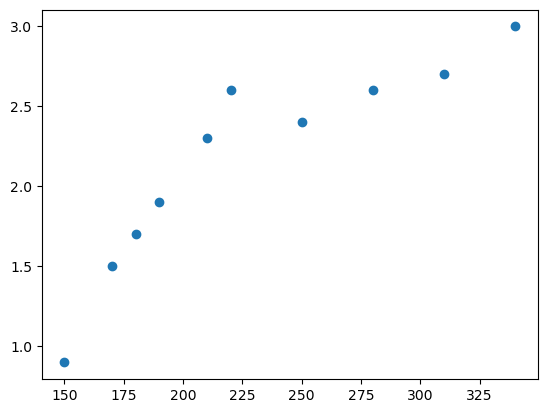

In [6]:
plt.scatter(df['ca'], df['fp'])

In [13]:
coef = np.corrcoef(df['ca'], df['fp'])
coef

array([[1.        , 0.89375779],
       [0.89375779, 1.        ]])

3. Etablir la droite de régression correspondant à ce problème et tracer cette droite. Vous pouvez utiliser l'instruction <code>linregress</code> du module <code>stats</code>

In [17]:
from scipy import stats
res = stats.linregress(df['ca'], df['fp'])

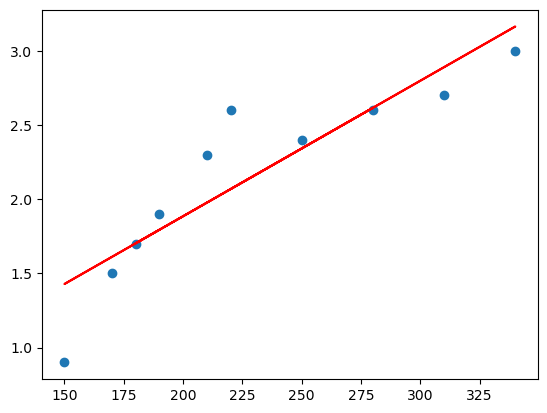

In [19]:
plt.plot(df['ca'], df['fp'], 'o', label='original data')
plt.plot(df['ca'], res.intercept + res.slope*df['ca'], 'r', label='fitted line')
plt.legend()

4. Tester la significativité de la régression au risque 5%.

5. Calculer le coefficient de détermination.

6. Quel serait le chiffre d’affaires mensuel prédit par le modèle pour un budget publicitaire mensuel de 400 euros ? de 4000 euros ?

### Exercice 2. Régression linéaire multiple

Nous voulons savoir quels sont les facteurs importants qui influencent la valeur d’une propriété. L'objectif est de construire un modèle qui nous aidera à évaluer cette valeur selon ces facteurs. Pour ce faire, nous utilisons la valeur totale pour un échantillon de 79 propriétés dans une région donnée. Voir le fichier <code>proprietes.csv</code> disponible à l’adresse :

http://www.labri.fr/~zemmari/ia_data/datasets/proprietes.csv

Le fichier contient les variables suivantes correspondant chacune à un facteur : 
- Valeur Totale : valeur globale de la propriété
- Valeur Terrain : valeur du terrain sur lequel est bâtie la maison
- Acre : Superficie en acres
- Pieds2 : Superficie en pieds2
- Extérieur : Etat extérieur
- Chauffage : Type du chauffage utilisé
- Pièces : Nombre de pièces dans la maison
- Chambres : Nombre de chambres dans la maison
- SbainsC : Nombre de salles de bain complètes
- Sbains : Nombre de salles de bain non complètes
- Foyers : Nombre de foyers
- Garage : Indique si la propriété contient un garage ou non.

Après avoir chargé les données dans un DataFrame vous pouvez visualiser les premières entrées avec la fonction head et inspecter globalement les données avec la fonction info. Y a-t-il des données manquantes?

1. Y a-t-il un lien entre la valeur totale et les différents facteurs ?

2. Afficher les valeurs des différentes statistiques desciptives.

3. Faites les différentes régressions linéaires simples possibles, et choisissez la (ou les) plus pertinente(s).

4. Faites la régression multiple de la Valeur totale en fonction des autres facteurs (quand c’est possible). Analysez les résultats obtenus.  Appuyez vous sur l'exemple vu en cours pour la méthode à suivre et l'utilisation de bibliothèques.